In [1]:
#Importing the Libraries
import os
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mandates
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras import backend as K
import time
from sklearn.preprocessing import StandardScaler

In [3]:
stdsc = StandardScaler()

In [5]:
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
df = pd.read_csv("C:/Users/KIIT/Research_6th_sem/hdfc5yr.csv",sep=',', index_col='Date', parse_dates=['Date'],date_parser=dateparse).fillna(0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-23,989.500000,989.500000,930.150024,967.875000,938.645935,7652310
2018-04-24,967.500000,974.025024,963.000000,967.500000,938.282166,2518708
2018-04-25,963.950012,969.000000,956.000000,960.375000,931.372375,2010296
2018-04-26,958.400024,969.599976,955.625000,965.125000,935.979004,3923740
2018-04-27,966.500000,967.750000,956.250000,961.700012,932.657471,2888504


In [6]:
print(df.isnull().sum())
df = df.apply (pd.to_numeric, errors='coerce')
df.drop(df[df['Close'] < 1].index, inplace = True)
df

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-23,989.500000,989.500000,930.150024,967.875000,938.645935,7652310
2018-04-24,967.500000,974.025024,963.000000,967.500000,938.282166,2518708
2018-04-25,963.950012,969.000000,956.000000,960.375000,931.372375,2010296
2018-04-26,958.400024,969.599976,955.625000,965.125000,935.979004,3923740
2018-04-27,966.500000,967.750000,956.250000,961.700012,932.657471,2888504
...,...,...,...,...,...,...
2023-04-17,1720.000000,1720.000000,1653.300049,1666.650024,1666.650024,16202574
2023-04-18,1670.000000,1677.250000,1656.400024,1659.599976,1659.599976,14818613
2023-04-19,1665.000000,1670.300049,1657.150024,1665.699951,1665.699951,12370584


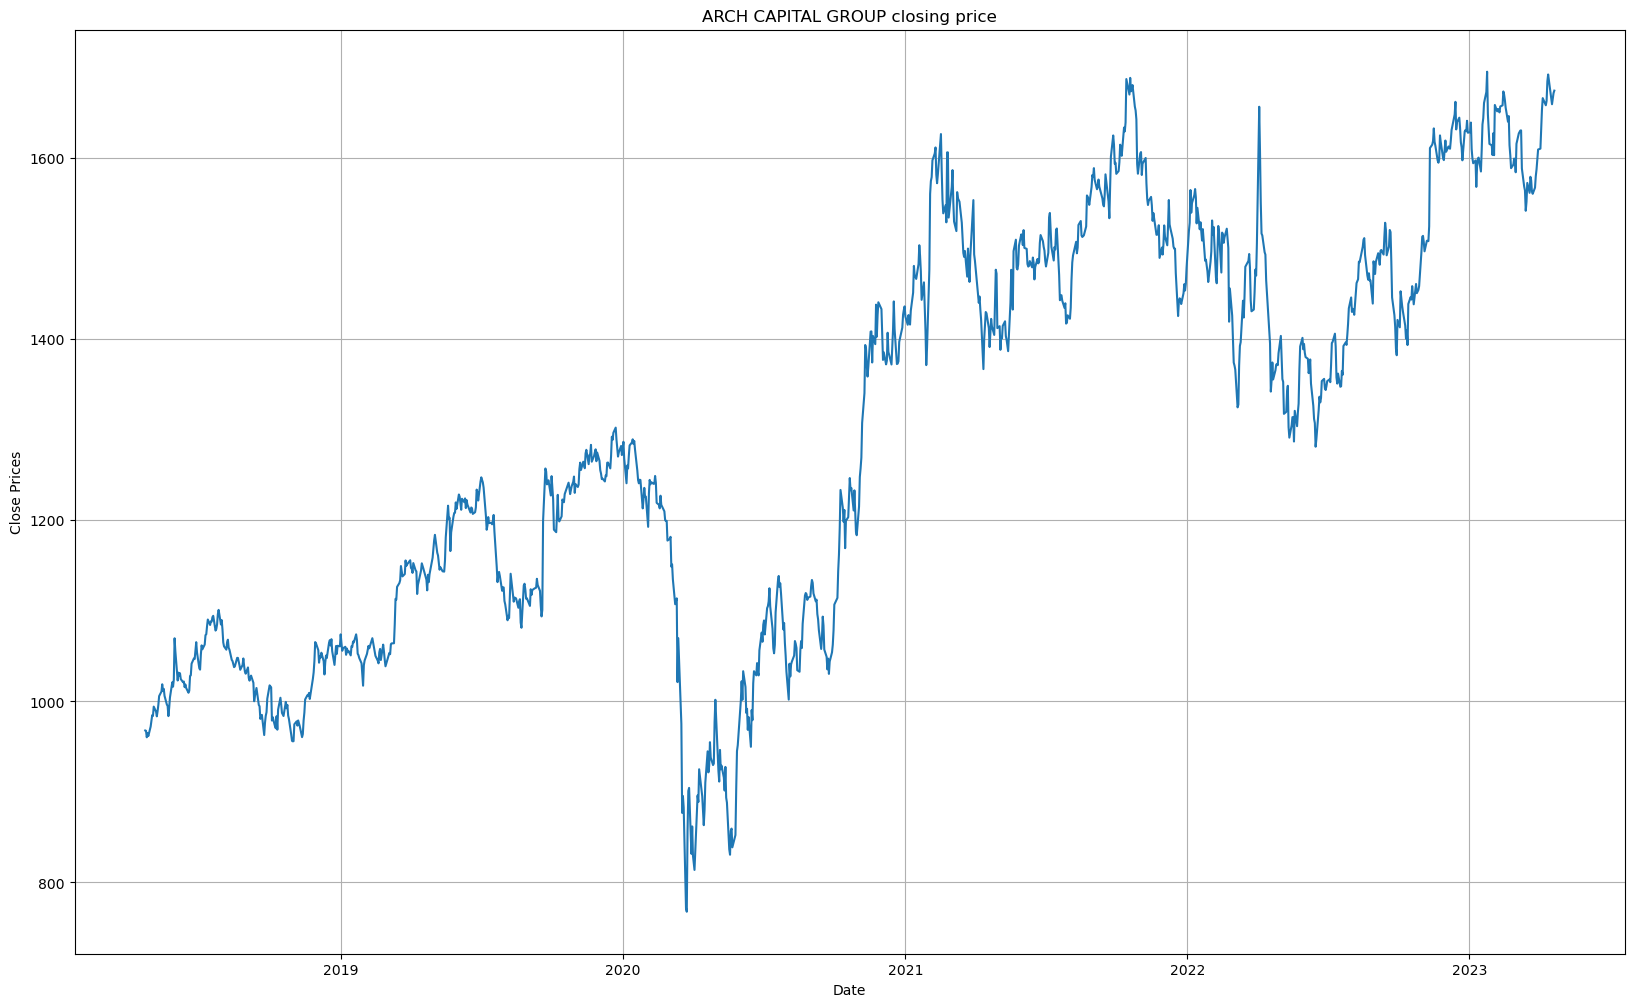

In [7]:
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

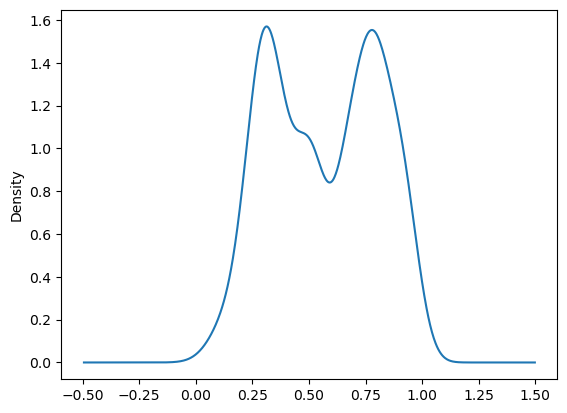

In [8]:
MAX_VALUE=df['Close'].max()
MIN_VALUE=df['Close'].min()
df['Close']=(df['Close']-df['Close'].min())/(df['Close'].max()-df['Close'].min())

df_close=df['Close']
df_close.drop(df_close[df_close == 0].index, inplace = True)
df_close.plot(kind='kde')

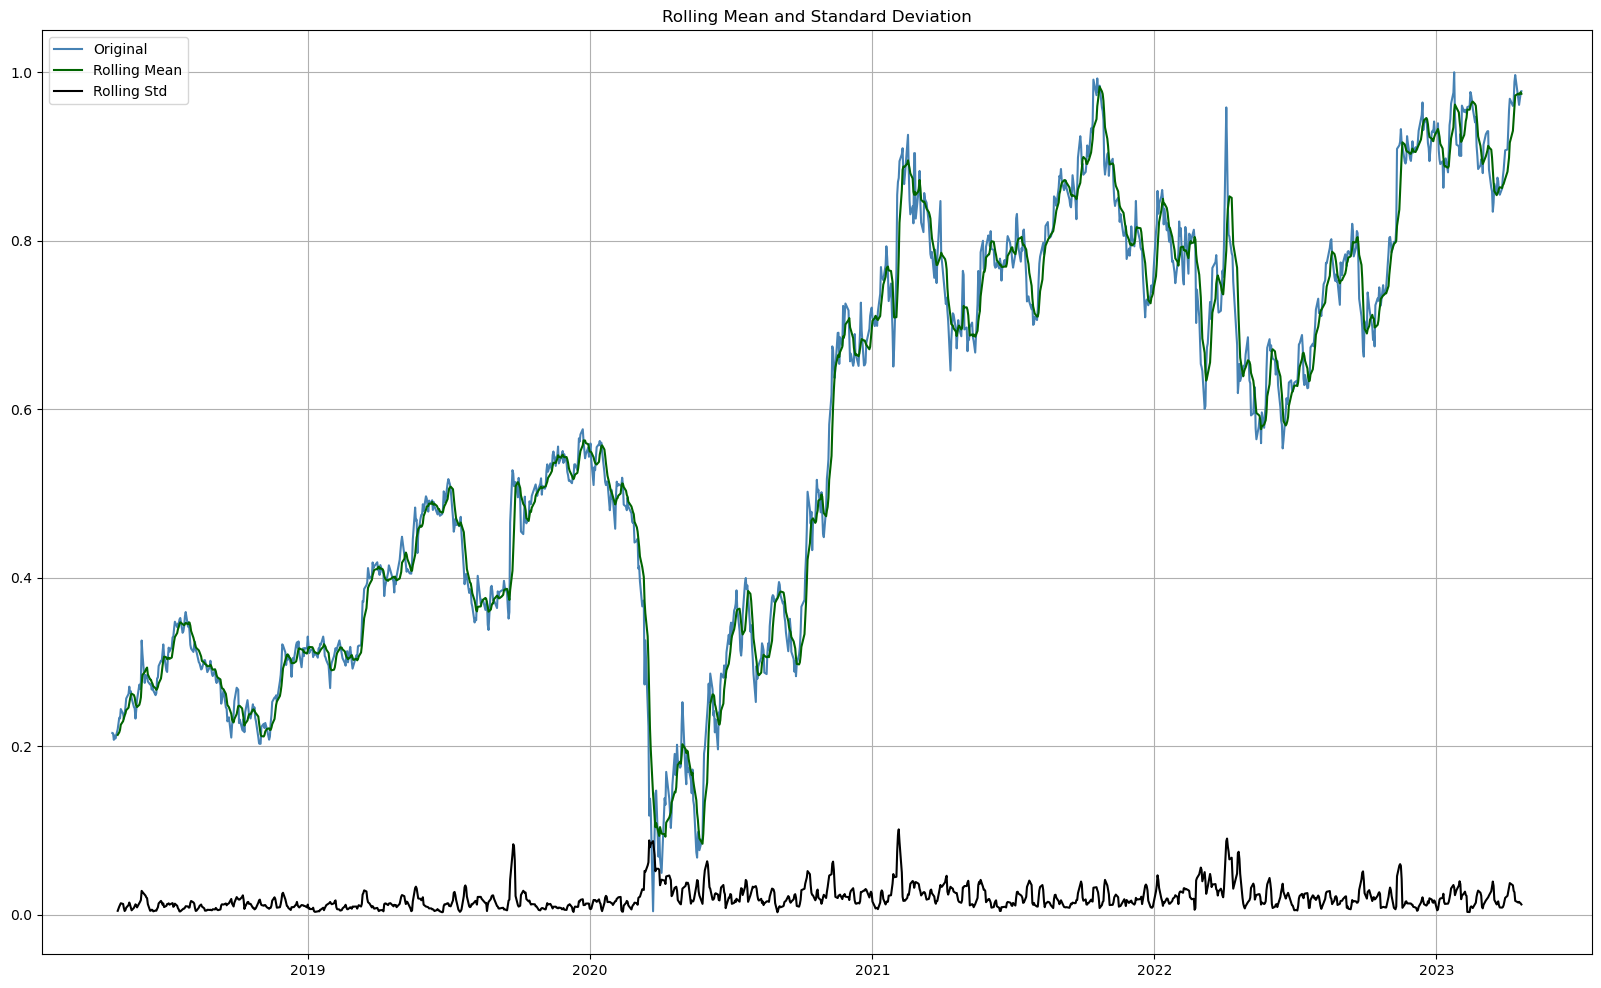

Results of dickey fuller test
Test Statistics                  -1.269141
p-value                           0.643169
No. of lags used                  8.000000
Number of observations used    1225.000000
critical value (1%)              -3.435699
critical value (5%)              -2.863902
critical value (10%)             -2.568028
dtype: float64


In [9]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(6).mean()
    rolstd = timeseries.rolling(6).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,12))
    plt.grid(True)
    plt.plot(timeseries, color='steelblue',label='Original')
    plt.plot(rolmean, color='darkgreen', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 640x480 with 0 Axes>

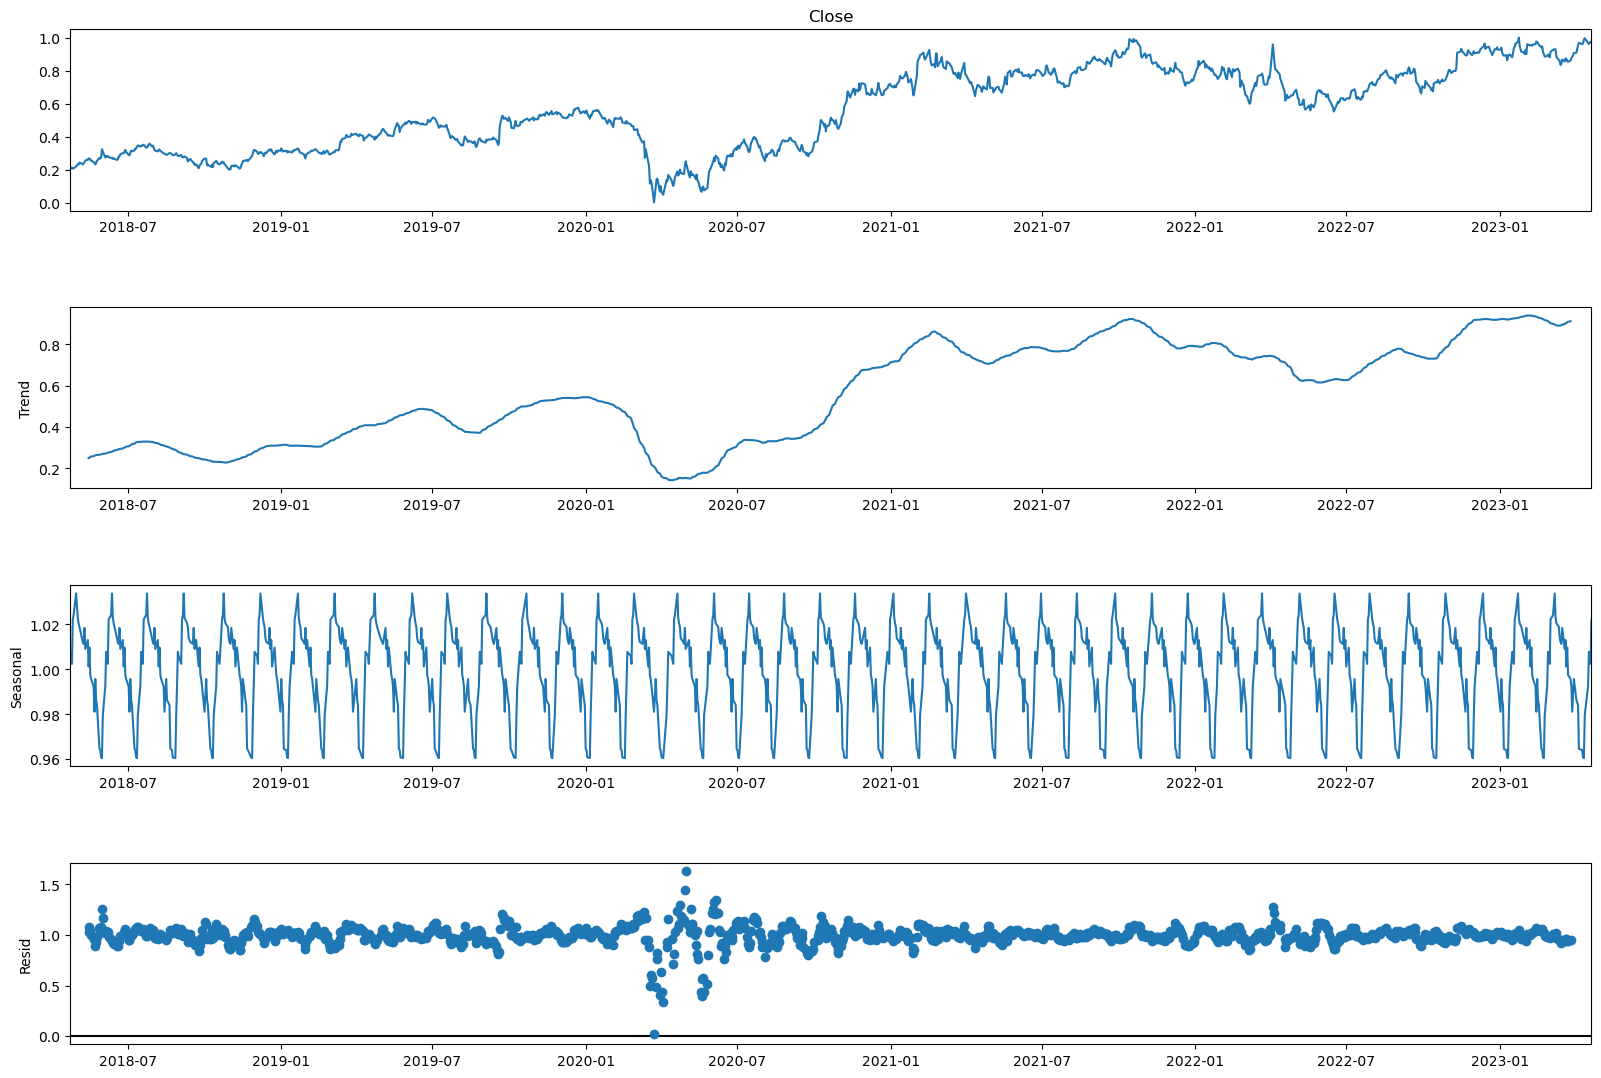

In [10]:
seperate = seasonal_decompose(df_close, model='multiplicative',period=30)
diagram=plt.figure()
diagram=seperate.plot()
diagram.set_size_inches(18,12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


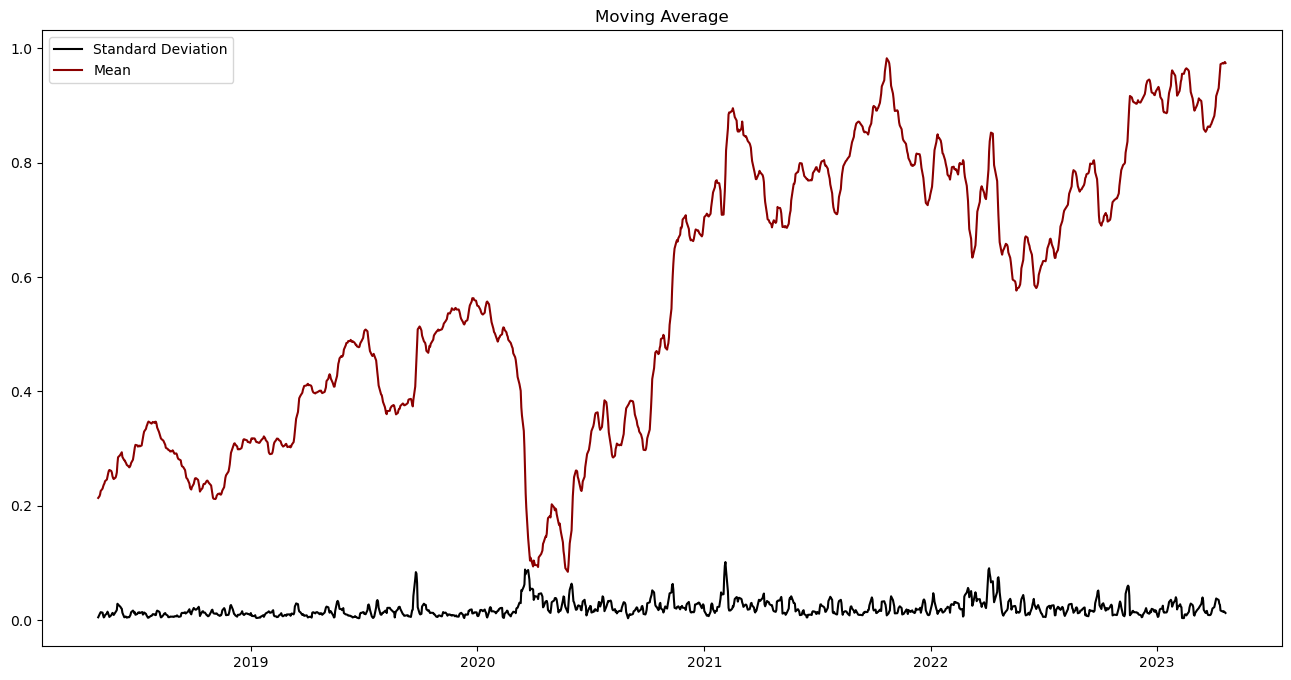

In [11]:
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
df_log = df_close
moving_avg = df_log.rolling(6).mean()
std_dev = df_log.rolling(6).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="darkred", label = "Mean")
plt.legend()
plt.show()

In [12]:
train_data, test_data = df_log[:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
print(train_data,train_data.shape)
print(test_data,test_data.shape)

Date
2018-04-23    0.215752
2018-04-24    0.215348
2018-04-25    0.207669
2018-04-26    0.212788
2018-04-27    0.209097
                ...   
2022-04-18    0.676601
2022-04-19    0.619207
2022-04-20    0.632248
2022-04-21    0.653859
2022-04-22    0.633649
Name: Close, Length: 987, dtype: float64 (987,)
Date
2022-04-25    0.644589
2022-04-26    0.651380
2022-04-27    0.651919
2022-04-28    0.650625
2022-04-29    0.664906
                ...   
2023-04-17    0.968905
2023-04-18    0.961306
2023-04-19    0.967881
2023-04-20    0.974564
2023-04-21    0.977474
Name: Close, Length: 247, dtype: float64 (247,)


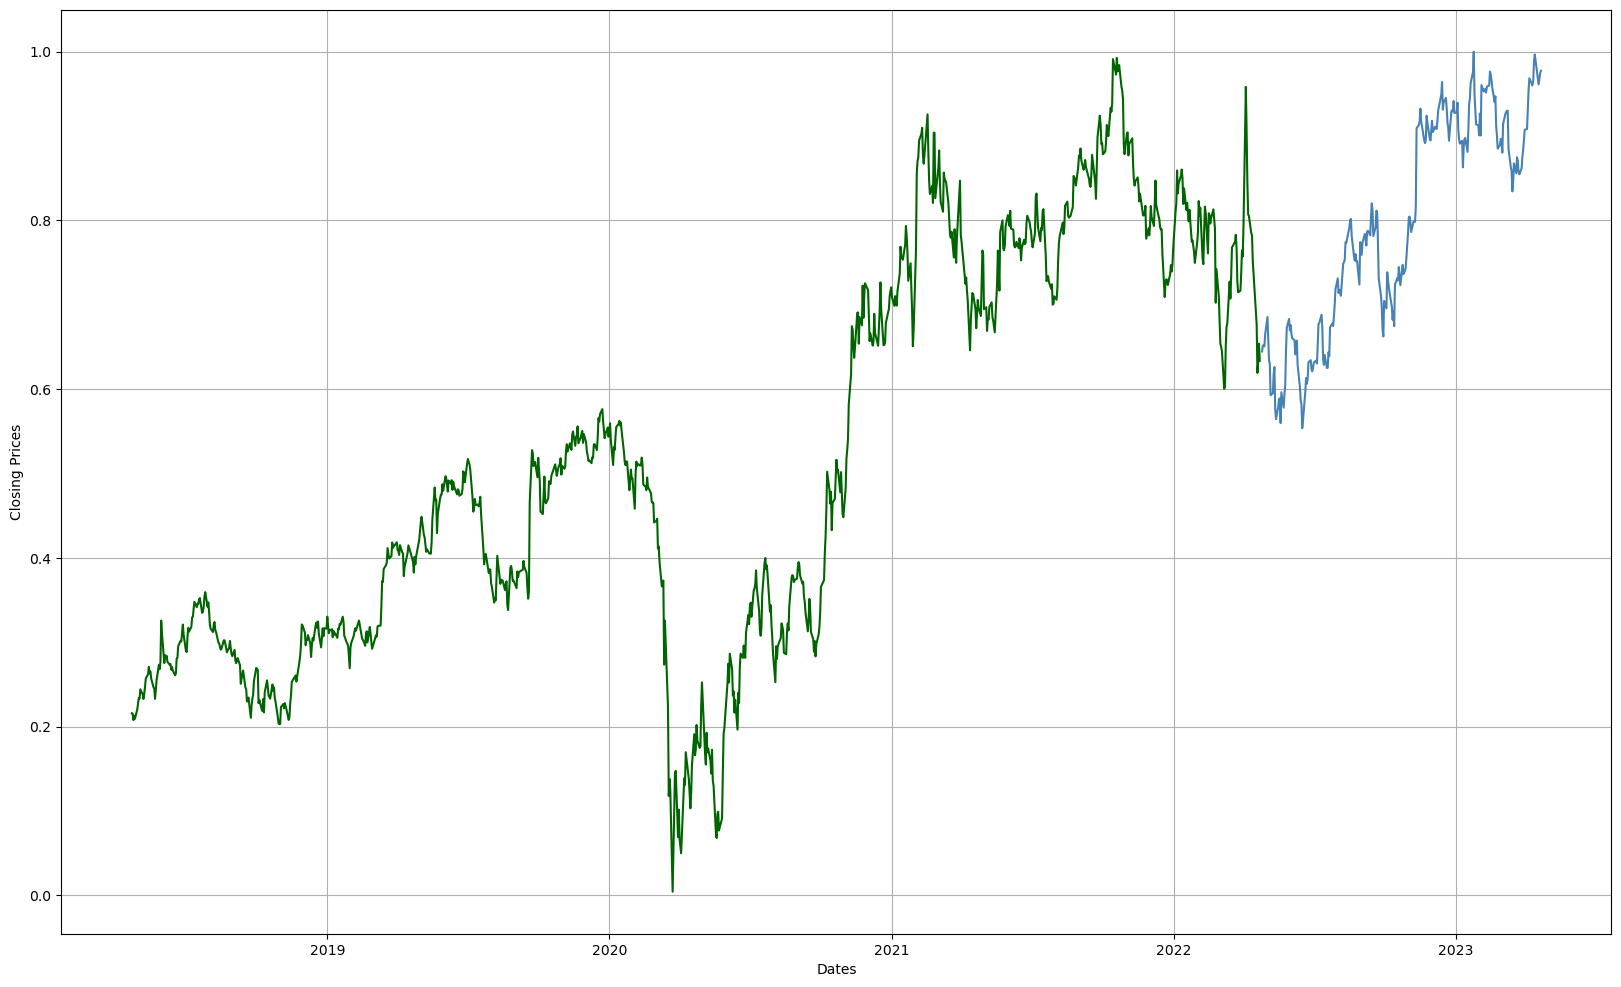

In [13]:
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'darkgreen', label='Train data')
plt.plot(test_data, 'steelblue', label='Test data')
#plt.legend()

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Build BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics ='accuracy' )

In [18]:
# Train BiLSTM model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/1000
31/31 [==============================] - 24s 118ms/step - loss: 114536006811648.0000 - accuracy: 0.0000e+00 - val_loss: 100927302270976.0000 - val_accuracy: 0.0000e+00
Epoch 2/1000
31/31 [==============================] - 1s 21ms/step - loss: 114535805485056.0000 - accuracy: 0.0000e+00 - val_loss: 100927176441856.0000 - val_accuracy: 0.0000e+00
Epoch 3/1000
31/31 [==============================] - 1s 21ms/step - loss: 114535671267328.0000 - accuracy: 0.0000e+00 - val_loss: 100927092555776.0000 - val_accuracy: 0.0000e+00
Epoch 4/1000
31/31 [==============================] - 1s 24ms/step - loss: 114535620935680.0000 - accuracy: 0.0000e+00 - val_loss: 100927017058304.0000 - val_accuracy: 0.0000e+00
Epoch 5/1000
31/31 [==============================] - 1s 31ms/step - loss: 114535553826816.0000 - accuracy: 0.0000e+00 - val_loss: 100926941560832.0000 - val_accuracy: 0.0000e+00
Epoch 6/1000
31/31 [==============================] - 1s 39ms/step - loss: 114535461552128.0000 - accur

31/31 [==============================] - 1s 27ms/step - loss: 114532642979840.0000 - accuracy: 0.0000e+00 - val_loss: 100924173320192.0000 - val_accuracy: 0.0000e+00
Epoch 47/1000
31/31 [==============================] - 1s 27ms/step - loss: 114532567482368.0000 - accuracy: 0.0000e+00 - val_loss: 100924097822720.0000 - val_accuracy: 0.0000e+00
Epoch 48/1000
31/31 [==============================] - 1s 32ms/step - loss: 114532491984896.0000 - accuracy: 0.0000e+00 - val_loss: 100924047491072.0000 - val_accuracy: 0.0000e+00
Epoch 49/1000
31/31 [==============================] - 1s 34ms/step - loss: 114532416487424.0000 - accuracy: 0.0000e+00 - val_loss: 100923963604992.0000 - val_accuracy: 0.0000e+00
Epoch 50/1000
31/31 [==============================] - 1s 38ms/step - loss: 114532374544384.0000 - accuracy: 0.0000e+00 - val_loss: 100923896496128.0000 - val_accuracy: 0.0000e+00
Epoch 51/1000
31/31 [==============================] - 1s 36ms/step - loss: 114532265492480.0000 - accuracy: 0.000

31/31 [==============================] - 1s 27ms/step - loss: 114529555972096.0000 - accuracy: 0.0000e+00 - val_loss: 100921178587136.0000 - val_accuracy: 0.0000e+00
Epoch 92/1000
31/31 [==============================] - 1s 32ms/step - loss: 114529455308800.0000 - accuracy: 0.0000e+00 - val_loss: 100921094701056.0000 - val_accuracy: 0.0000e+00
Epoch 93/1000
31/31 [==============================] - 1s 36ms/step - loss: 114529354645504.0000 - accuracy: 0.0000e+00 - val_loss: 100921027592192.0000 - val_accuracy: 0.0000e+00
Epoch 94/1000
31/31 [==============================] - 1s 34ms/step - loss: 114529304313856.0000 - accuracy: 0.0000e+00 - val_loss: 100920960483328.0000 - val_accuracy: 0.0000e+00
Epoch 95/1000
31/31 [==============================] - 1s 36ms/step - loss: 114529262370816.0000 - accuracy: 0.0000e+00 - val_loss: 100920901763072.0000 - val_accuracy: 0.0000e+00
Epoch 96/1000
31/31 [==============================] - 1s 38ms/step - loss: 114529136541696.0000 - accuracy: 0.000

31/31 [==============================] - 1s 31ms/step - loss: 114526418632704.0000 - accuracy: 0.0000e+00 - val_loss: 100918175465472.0000 - val_accuracy: 0.0000e+00
Epoch 137/1000
31/31 [==============================] - 1s 27ms/step - loss: 114526334746624.0000 - accuracy: 0.0000e+00 - val_loss: 100918091579392.0000 - val_accuracy: 0.0000e+00
Epoch 138/1000
31/31 [==============================] - 1s 20ms/step - loss: 114526242471936.0000 - accuracy: 0.0000e+00 - val_loss: 100918032859136.0000 - val_accuracy: 0.0000e+00
Epoch 139/1000
31/31 [==============================] - 1s 18ms/step - loss: 114526175363072.0000 - accuracy: 0.0000e+00 - val_loss: 100917957361664.0000 - val_accuracy: 0.0000e+00
Epoch 140/1000
31/31 [==============================] - 1s 19ms/step - loss: 114526116642816.0000 - accuracy: 0.0000e+00 - val_loss: 100917890252800.0000 - val_accuracy: 0.0000e+00
Epoch 141/1000
31/31 [==============================] - 1s 19ms/step - loss: 114526091476992.0000 - accuracy: 

31/31 [==============================] - 1s 19ms/step - loss: 114523306459136.0000 - accuracy: 0.0000e+00 - val_loss: 100915180732416.0000 - val_accuracy: 0.0000e+00
Epoch 182/1000
31/31 [==============================] - 1s 20ms/step - loss: 114523189018624.0000 - accuracy: 0.0000e+00 - val_loss: 100915105234944.0000 - val_accuracy: 0.0000e+00
Epoch 183/1000
31/31 [==============================] - 1s 18ms/step - loss: 114523130298368.0000 - accuracy: 0.0000e+00 - val_loss: 100915029737472.0000 - val_accuracy: 0.0000e+00
Epoch 184/1000
31/31 [==============================] - 1s 18ms/step - loss: 114523088355328.0000 - accuracy: 0.0000e+00 - val_loss: 100914979405824.0000 - val_accuracy: 0.0000e+00
Epoch 185/1000
31/31 [==============================] - 1s 19ms/step - loss: 114523012857856.0000 - accuracy: 0.0000e+00 - val_loss: 100914895519744.0000 - val_accuracy: 0.0000e+00
Epoch 186/1000
31/31 [==============================] - 1s 19ms/step - loss: 114522928971776.0000 - accuracy: 

31/31 [==============================] - 1s 17ms/step - loss: 114520160731136.0000 - accuracy: 0.0000e+00 - val_loss: 100912185999360.0000 - val_accuracy: 0.0000e+00
Epoch 227/1000
31/31 [==============================] - 1s 18ms/step - loss: 114520102010880.0000 - accuracy: 0.0000e+00 - val_loss: 100912118890496.0000 - val_accuracy: 0.0000e+00
Epoch 228/1000
31/31 [==============================] - 1s 20ms/step - loss: 114520026513408.0000 - accuracy: 0.0000e+00 - val_loss: 100912051781632.0000 - val_accuracy: 0.0000e+00
Epoch 229/1000
31/31 [==============================] - 1s 19ms/step - loss: 114519976181760.0000 - accuracy: 0.0000e+00 - val_loss: 100911967895552.0000 - val_accuracy: 0.0000e+00
Epoch 230/1000
31/31 [==============================] - 1s 19ms/step - loss: 114519883907072.0000 - accuracy: 0.0000e+00 - val_loss: 100911917563904.0000 - val_accuracy: 0.0000e+00
Epoch 231/1000
31/31 [==============================] - 1s 19ms/step - loss: 114519800020992.0000 - accuracy: 

31/31 [==============================] - 1s 20ms/step - loss: 114517056946176.0000 - accuracy: 0.0000e+00 - val_loss: 100909191266304.0000 - val_accuracy: 0.0000e+00
Epoch 272/1000
31/31 [==============================] - 1s 21ms/step - loss: 114517015003136.0000 - accuracy: 0.0000e+00 - val_loss: 100909115768832.0000 - val_accuracy: 0.0000e+00
Epoch 273/1000
31/31 [==============================] - 1s 21ms/step - loss: 114516897562624.0000 - accuracy: 0.0000e+00 - val_loss: 100909057048576.0000 - val_accuracy: 0.0000e+00
Epoch 274/1000
31/31 [==============================] - 1s 21ms/step - loss: 114516872396800.0000 - accuracy: 0.0000e+00 - val_loss: 100908998328320.0000 - val_accuracy: 0.0000e+00
Epoch 275/1000
31/31 [==============================] - 1s 22ms/step - loss: 114516813676544.0000 - accuracy: 0.0000e+00 - val_loss: 100908922830848.0000 - val_accuracy: 0.0000e+00
Epoch 276/1000
31/31 [==============================] - 1s 22ms/step - loss: 114516713013248.0000 - accuracy: 

31/31 [==============================] - 1s 19ms/step - loss: 114513953161216.0000 - accuracy: 0.0000e+00 - val_loss: 100906196533248.0000 - val_accuracy: 0.0000e+00
Epoch 317/1000
31/31 [==============================] - 1s 19ms/step - loss: 114513886052352.0000 - accuracy: 0.0000e+00 - val_loss: 100906129424384.0000 - val_accuracy: 0.0000e+00
Epoch 318/1000
31/31 [==============================] - 1s 19ms/step - loss: 114513810554880.0000 - accuracy: 0.0000e+00 - val_loss: 100906053926912.0000 - val_accuracy: 0.0000e+00
Epoch 319/1000
31/31 [==============================] - 1s 18ms/step - loss: 114513634394112.0000 - accuracy: 0.0000e+00 - val_loss: 100905995206656.0000 - val_accuracy: 0.0000e+00
Epoch 320/1000
31/31 [==============================] - 1s 19ms/step - loss: 114513667948544.0000 - accuracy: 0.0000e+00 - val_loss: 100905928097792.0000 - val_accuracy: 0.0000e+00
Epoch 321/1000
31/31 [==============================] - 1s 19ms/step - loss: 114513500176384.0000 - accuracy: 

31/31 [==============================] - 1s 19ms/step - loss: 114510849376256.0000 - accuracy: 0.0000e+00 - val_loss: 100903193411584.0000 - val_accuracy: 0.0000e+00
Epoch 362/1000
31/31 [==============================] - 1s 19ms/step - loss: 114510782267392.0000 - accuracy: 0.0000e+00 - val_loss: 100903134691328.0000 - val_accuracy: 0.0000e+00
Epoch 363/1000
31/31 [==============================] - 1s 19ms/step - loss: 114510723547136.0000 - accuracy: 0.0000e+00 - val_loss: 100903075971072.0000 - val_accuracy: 0.0000e+00
Epoch 364/1000
31/31 [==============================] - 1s 19ms/step - loss: 114510606106624.0000 - accuracy: 0.0000e+00 - val_loss: 100903008862208.0000 - val_accuracy: 0.0000e+00
Epoch 365/1000
31/31 [==============================] - 1s 18ms/step - loss: 114510555774976.0000 - accuracy: 0.0000e+00 - val_loss: 100902941753344.0000 - val_accuracy: 0.0000e+00
Epoch 366/1000
31/31 [==============================] - 1s 18ms/step - loss: 114510505443328.0000 - accuracy: 

31/31 [==============================] - 1s 19ms/step - loss: 114507678482432.0000 - accuracy: 0.0000e+00 - val_loss: 100900207067136.0000 - val_accuracy: 0.0000e+00
Epoch 407/1000
31/31 [==============================] - 1s 19ms/step - loss: 114507619762176.0000 - accuracy: 0.0000e+00 - val_loss: 100900139958272.0000 - val_accuracy: 0.0000e+00
Epoch 408/1000
31/31 [==============================] - 1s 17ms/step - loss: 114507569430528.0000 - accuracy: 0.0000e+00 - val_loss: 100900072849408.0000 - val_accuracy: 0.0000e+00
Epoch 409/1000
31/31 [==============================] - 1s 18ms/step - loss: 114507384881152.0000 - accuracy: 0.0000e+00 - val_loss: 100900005740544.0000 - val_accuracy: 0.0000e+00
Epoch 410/1000
31/31 [==============================] - 1s 18ms/step - loss: 114507418435584.0000 - accuracy: 0.0000e+00 - val_loss: 100899938631680.0000 - val_accuracy: 0.0000e+00
Epoch 411/1000
31/31 [==============================] - 1s 19ms/step - loss: 114507275829248.0000 - accuracy: 

31/31 [==============================] - 1s 19ms/step - loss: 114504415313920.0000 - accuracy: 0.0000e+00 - val_loss: 100897203945472.0000 - val_accuracy: 0.0000e+00
Epoch 452/1000
31/31 [==============================] - 1s 18ms/step - loss: 114504541143040.0000 - accuracy: 0.0000e+00 - val_loss: 100897136836608.0000 - val_accuracy: 0.0000e+00
Epoch 453/1000
31/31 [==============================] - 1s 19ms/step - loss: 114504490811392.0000 - accuracy: 0.0000e+00 - val_loss: 100897069727744.0000 - val_accuracy: 0.0000e+00
Epoch 454/1000
31/31 [==============================] - 1s 19ms/step - loss: 114504289484800.0000 - accuracy: 0.0000e+00 - val_loss: 100897002618880.0000 - val_accuracy: 0.0000e+00
Epoch 455/1000
31/31 [==============================] - 1s 19ms/step - loss: 114504331427840.0000 - accuracy: 0.0000e+00 - val_loss: 100896943898624.0000 - val_accuracy: 0.0000e+00
Epoch 456/1000
31/31 [==============================] - 1s 19ms/step - loss: 114504230764544.0000 - accuracy: 

31/31 [==============================] - 1s 20ms/step - loss: 114501496078336.0000 - accuracy: 0.0000e+00 - val_loss: 100894217601024.0000 - val_accuracy: 0.0000e+00
Epoch 497/1000
31/31 [==============================] - 1s 18ms/step - loss: 114501336694784.0000 - accuracy: 0.0000e+00 - val_loss: 100894142103552.0000 - val_accuracy: 0.0000e+00
Epoch 498/1000
31/31 [==============================] - 1s 20ms/step - loss: 114501294751744.0000 - accuracy: 0.0000e+00 - val_loss: 100894083383296.0000 - val_accuracy: 0.0000e+00
Epoch 499/1000
31/31 [==============================] - 1s 19ms/step - loss: 114501378637824.0000 - accuracy: 0.0000e+00 - val_loss: 100894016274432.0000 - val_accuracy: 0.0000e+00
Epoch 500/1000
31/31 [==============================] - 1s 20ms/step - loss: 114501252808704.0000 - accuracy: 0.0000e+00 - val_loss: 100893949165568.0000 - val_accuracy: 0.0000e+00
Epoch 501/1000
31/31 [==============================] - 1s 21ms/step - loss: 114501202477056.0000 - accuracy: 

31/31 [==============================] - 1s 19ms/step - loss: 114498392293376.0000 - accuracy: 0.0000e+00 - val_loss: 100891214479360.0000 - val_accuracy: 0.0000e+00
Epoch 542/1000
31/31 [==============================] - 1s 20ms/step - loss: 114498300018688.0000 - accuracy: 0.0000e+00 - val_loss: 100891147370496.0000 - val_accuracy: 0.0000e+00
Epoch 543/1000
31/31 [==============================] - 1s 19ms/step - loss: 114498207744000.0000 - accuracy: 0.0000e+00 - val_loss: 100891088650240.0000 - val_accuracy: 0.0000e+00
Epoch 544/1000
31/31 [==============================] - 1s 19ms/step - loss: 114498123857920.0000 - accuracy: 0.0000e+00 - val_loss: 100891021541376.0000 - val_accuracy: 0.0000e+00
Epoch 545/1000
31/31 [==============================] - 1s 20ms/step - loss: 114498039971840.0000 - accuracy: 0.0000e+00 - val_loss: 100890954432512.0000 - val_accuracy: 0.0000e+00
Epoch 546/1000
31/31 [==============================] - 1s 19ms/step - loss: 114498081914880.0000 - accuracy: 

31/31 [==============================] - 1s 20ms/step - loss: 114495322062848.0000 - accuracy: 0.0000e+00 - val_loss: 100888236523520.0000 - val_accuracy: 0.0000e+00
Epoch 587/1000
31/31 [==============================] - 1s 20ms/step - loss: 114495280119808.0000 - accuracy: 0.0000e+00 - val_loss: 100888169414656.0000 - val_accuracy: 0.0000e+00
Epoch 588/1000
31/31 [==============================] - 1s 20ms/step - loss: 114495062016000.0000 - accuracy: 0.0000e+00 - val_loss: 100888093917184.0000 - val_accuracy: 0.0000e+00
Epoch 589/1000
31/31 [==============================] - 1s 20ms/step - loss: 114495154290688.0000 - accuracy: 0.0000e+00 - val_loss: 100888043585536.0000 - val_accuracy: 0.0000e+00
Epoch 590/1000
31/31 [==============================] - 1s 20ms/step - loss: 114495003295744.0000 - accuracy: 0.0000e+00 - val_loss: 100887968088064.0000 - val_accuracy: 0.0000e+00
Epoch 591/1000
31/31 [==============================] - 1s 20ms/step - loss: 114494911021056.0000 - accuracy: 

31/31 [==============================] - 1s 19ms/step - loss: 114492058894336.0000 - accuracy: 0.0000e+00 - val_loss: 100885241790464.0000 - val_accuracy: 0.0000e+00
Epoch 632/1000
31/31 [==============================] - 1s 20ms/step - loss: 114492109225984.0000 - accuracy: 0.0000e+00 - val_loss: 100885174681600.0000 - val_accuracy: 0.0000e+00
Epoch 633/1000
31/31 [==============================] - 1s 21ms/step - loss: 114492042117120.0000 - accuracy: 0.0000e+00 - val_loss: 100885115961344.0000 - val_accuracy: 0.0000e+00
Epoch 634/1000
31/31 [==============================] - 1s 21ms/step - loss: 114492000174080.0000 - accuracy: 0.0000e+00 - val_loss: 100885032075264.0000 - val_accuracy: 0.0000e+00
Epoch 635/1000
31/31 [==============================] - 1s 21ms/step - loss: 114491832401920.0000 - accuracy: 0.0000e+00 - val_loss: 100884981743616.0000 - val_accuracy: 0.0000e+00
Epoch 636/1000
31/31 [==============================] - 1s 21ms/step - loss: 114491882733568.0000 - accuracy: 

31/31 [==============================] - 1s 29ms/step - loss: 114488988663808.0000 - accuracy: 0.0000e+00 - val_loss: 100882255446016.0000 - val_accuracy: 0.0000e+00
Epoch 677/1000
31/31 [==============================] - 1s 40ms/step - loss: 114488795725824.0000 - accuracy: 0.0000e+00 - val_loss: 100882179948544.0000 - val_accuracy: 0.0000e+00
Epoch 678/1000
31/31 [==============================] - 1s 36ms/step - loss: 114488778948608.0000 - accuracy: 0.0000e+00 - val_loss: 100882121228288.0000 - val_accuracy: 0.0000e+00
Epoch 679/1000
31/31 [==============================] - 1s 40ms/step - loss: 114488921554944.0000 - accuracy: 0.0000e+00 - val_loss: 100882054119424.0000 - val_accuracy: 0.0000e+00
Epoch 680/1000
31/31 [==============================] - 1s 39ms/step - loss: 114488778948608.0000 - accuracy: 0.0000e+00 - val_loss: 100881970233344.0000 - val_accuracy: 0.0000e+00
Epoch 681/1000
31/31 [==============================] - 1s 36ms/step - loss: 114488787337216.0000 - accuracy: 

31/31 [==============================] - 1s 35ms/step - loss: 114485918433280.0000 - accuracy: 0.0000e+00 - val_loss: 100879252324352.0000 - val_accuracy: 0.0000e+00
Epoch 722/1000
31/31 [==============================] - 1s 35ms/step - loss: 114485800992768.0000 - accuracy: 0.0000e+00 - val_loss: 100879193604096.0000 - val_accuracy: 0.0000e+00
Epoch 723/1000
31/31 [==============================] - 1s 34ms/step - loss: 114485876490240.0000 - accuracy: 0.0000e+00 - val_loss: 100879109718016.0000 - val_accuracy: 0.0000e+00
Epoch 724/1000
31/31 [==============================] - 1s 36ms/step - loss: 114485691940864.0000 - accuracy: 0.0000e+00 - val_loss: 100879042609152.0000 - val_accuracy: 0.0000e+00
Epoch 725/1000
31/31 [==============================] - 1s 35ms/step - loss: 114485641609216.0000 - accuracy: 0.0000e+00 - val_loss: 100878992277504.0000 - val_accuracy: 0.0000e+00
Epoch 726/1000
31/31 [==============================] - 1s 33ms/step - loss: 114485641609216.0000 - accuracy: 

31/31 [==============================] - 1s 35ms/step - loss: 114482755928064.0000 - accuracy: 0.0000e+00 - val_loss: 100876249202688.0000 - val_accuracy: 0.0000e+00
Epoch 767/1000
31/31 [==============================] - 1s 37ms/step - loss: 114482730762240.0000 - accuracy: 0.0000e+00 - val_loss: 100876190482432.0000 - val_accuracy: 0.0000e+00
Epoch 768/1000
31/31 [==============================] - 1s 33ms/step - loss: 114482672041984.0000 - accuracy: 0.0000e+00 - val_loss: 100876114984960.0000 - val_accuracy: 0.0000e+00
Epoch 769/1000
31/31 [==============================] - 1s 40ms/step - loss: 114482395217920.0000 - accuracy: 0.0000e+00 - val_loss: 100876064653312.0000 - val_accuracy: 0.0000e+00
Epoch 770/1000
31/31 [==============================] - 1s 42ms/step - loss: 114482286166016.0000 - accuracy: 0.0000e+00 - val_loss: 100875980767232.0000 - val_accuracy: 0.0000e+00
Epoch 771/1000
31/31 [==============================] - 1s 37ms/step - loss: 114482521047040.0000 - accuracy: 

31/31 [==============================] - 1s 38ms/step - loss: 114479710863360.0000 - accuracy: 0.0000e+00 - val_loss: 100873262858240.0000 - val_accuracy: 0.0000e+00
Epoch 812/1000
31/31 [==============================] - 1s 39ms/step - loss: 114479576645632.0000 - accuracy: 0.0000e+00 - val_loss: 100873195749376.0000 - val_accuracy: 0.0000e+00
Epoch 813/1000
31/31 [==============================] - 1s 38ms/step - loss: 114479585034240.0000 - accuracy: 0.0000e+00 - val_loss: 100873128640512.0000 - val_accuracy: 0.0000e+00
Epoch 814/1000
31/31 [==============================] - 1s 38ms/step - loss: 114479618588672.0000 - accuracy: 0.0000e+00 - val_loss: 100873061531648.0000 - val_accuracy: 0.0000e+00
Epoch 815/1000
31/31 [==============================] - 1s 41ms/step - loss: 114479517925376.0000 - accuracy: 0.0000e+00 - val_loss: 100872994422784.0000 - val_accuracy: 0.0000e+00
Epoch 816/1000
31/31 [==============================] - 1s 39ms/step - loss: 114479266267136.0000 - accuracy: 

31/31 [==============================] - 1s 37ms/step - loss: 114476439306240.0000 - accuracy: 0.0000e+00 - val_loss: 100870268125184.0000 - val_accuracy: 0.0000e+00
Epoch 857/1000
31/31 [==============================] - 1s 37ms/step - loss: 114476439306240.0000 - accuracy: 0.0000e+00 - val_loss: 100870201016320.0000 - val_accuracy: 0.0000e+00
Epoch 858/1000
31/31 [==============================] - 1s 37ms/step - loss: 114476414140416.0000 - accuracy: 0.0000e+00 - val_loss: 100870133907456.0000 - val_accuracy: 0.0000e+00
Epoch 859/1000
31/31 [==============================] - 1s 36ms/step - loss: 114476229591040.0000 - accuracy: 0.0000e+00 - val_loss: 100870075187200.0000 - val_accuracy: 0.0000e+00
Epoch 860/1000
31/31 [==============================] - 1s 34ms/step - loss: 114476196036608.0000 - accuracy: 0.0000e+00 - val_loss: 100870008078336.0000 - val_accuracy: 0.0000e+00
Epoch 861/1000
31/31 [==============================] - 1s 30ms/step - loss: 114476246368256.0000 - accuracy: 

31/31 [==============================] - 1s 41ms/step - loss: 114473385852928.0000 - accuracy: 0.0000e+00 - val_loss: 100867273392128.0000 - val_accuracy: 0.0000e+00
Epoch 902/1000
31/31 [==============================] - 1s 39ms/step - loss: 114473436184576.0000 - accuracy: 0.0000e+00 - val_loss: 100867214671872.0000 - val_accuracy: 0.0000e+00
Epoch 903/1000
31/31 [==============================] - 1s 39ms/step - loss: 114473301966848.0000 - accuracy: 0.0000e+00 - val_loss: 100867147563008.0000 - val_accuracy: 0.0000e+00
Epoch 904/1000
31/31 [==============================] - 1s 38ms/step - loss: 114473176137728.0000 - accuracy: 0.0000e+00 - val_loss: 100867072065536.0000 - val_accuracy: 0.0000e+00
Epoch 905/1000
31/31 [==============================] - 1s 40ms/step - loss: 114473041920000.0000 - accuracy: 0.0000e+00 - val_loss: 100867013345280.0000 - val_accuracy: 0.0000e+00
Epoch 906/1000
31/31 [==============================] - 1s 40ms/step - loss: 114472974811136.0000 - accuracy: 

31/31 [==============================] - 1s 37ms/step - loss: 114470181404672.0000 - accuracy: 0.0000e+00 - val_loss: 100864287047680.0000 - val_accuracy: 0.0000e+00
Epoch 947/1000
31/31 [==============================] - 1s 38ms/step - loss: 114470391119872.0000 - accuracy: 0.0000e+00 - val_loss: 100864219938816.0000 - val_accuracy: 0.0000e+00
Epoch 948/1000
31/31 [==============================] - 1s 33ms/step - loss: 114470005243904.0000 - accuracy: 0.0000e+00 - val_loss: 100864161218560.0000 - val_accuracy: 0.0000e+00
Epoch 949/1000
31/31 [==============================] - 1s 30ms/step - loss: 114470097518592.0000 - accuracy: 0.0000e+00 - val_loss: 100864094109696.0000 - val_accuracy: 0.0000e+00
Epoch 950/1000
31/31 [==============================] - 1s 26ms/step - loss: 114470013632512.0000 - accuracy: 0.0000e+00 - val_loss: 100864018612224.0000 - val_accuracy: 0.0000e+00
Epoch 951/1000
31/31 [==============================] - 1s 26ms/step - loss: 114469912969216.0000 - accuracy: 

31/31 [==============================] - 1s 38ms/step - loss: 114467136339968.0000 - accuracy: 0.0000e+00 - val_loss: 100861300703232.0000 - val_accuracy: 0.0000e+00
Epoch 992/1000
31/31 [==============================] - 1s 36ms/step - loss: 114467035676672.0000 - accuracy: 0.0000e+00 - val_loss: 100861216817152.0000 - val_accuracy: 0.0000e+00
Epoch 993/1000
31/31 [==============================] - 1s 32ms/step - loss: 114466968567808.0000 - accuracy: 0.0000e+00 - val_loss: 100861158096896.0000 - val_accuracy: 0.0000e+00
Epoch 994/1000
31/31 [==============================] - 1s 29ms/step - loss: 114466876293120.0000 - accuracy: 0.0000e+00 - val_loss: 100861107765248.0000 - val_accuracy: 0.0000e+00
Epoch 995/1000
31/31 [==============================] - 1s 32ms/step - loss: 114466884681728.0000 - accuracy: 0.0000e+00 - val_loss: 100861023879168.0000 - val_accuracy: 0.0000e+00
Epoch 996/1000
31/31 [==============================] - 1s 28ms/step - loss: 114466834350080.0000 - accuracy: 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 128)           33792     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 132,737
Trainable params: 132,737
Non-trai

8/8 [==============================] - 3s 7ms/step


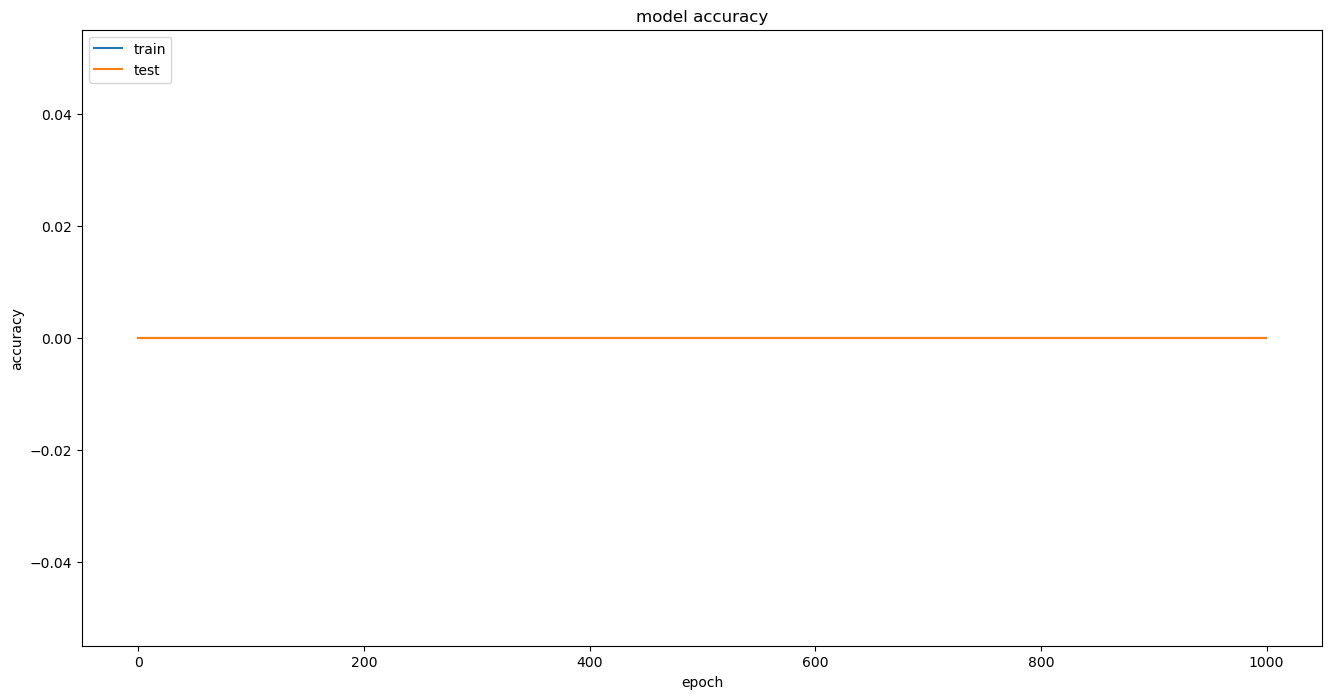

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

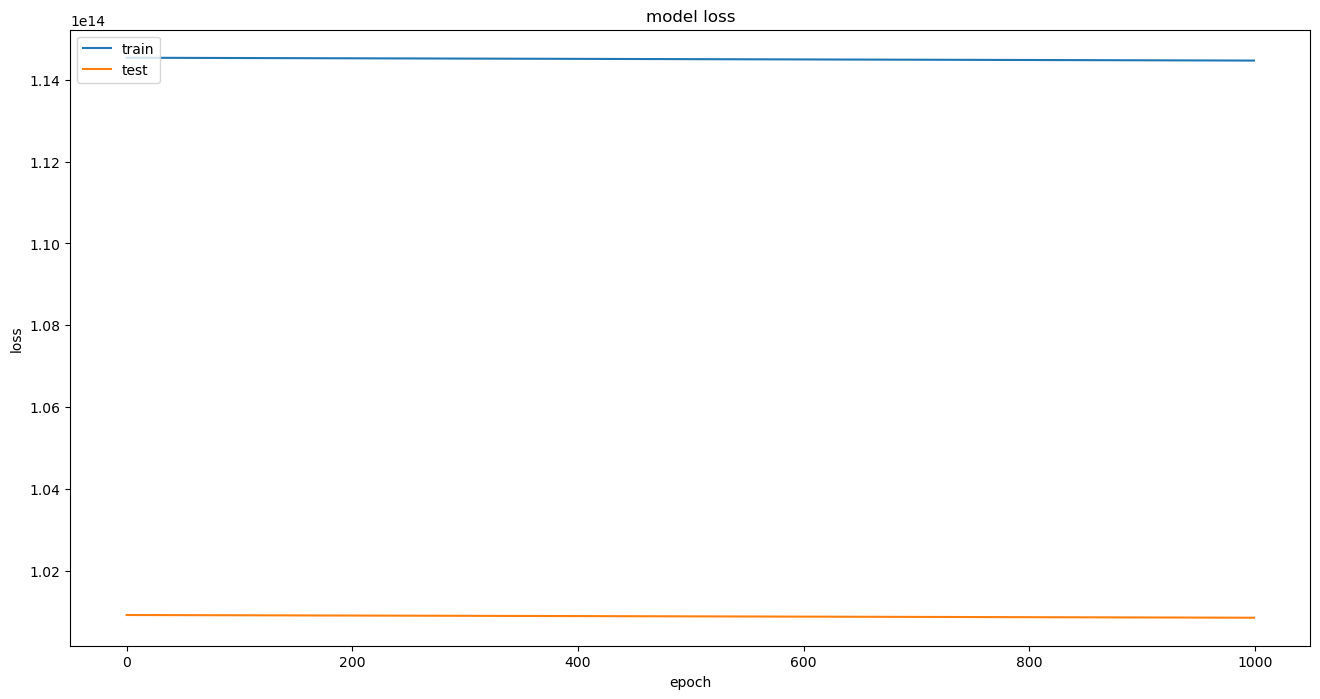

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_pred = model.predict(X_test)

8/8 [==============================] - 3s 5ms/step


In [23]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3.96782129e+03 7.56444400e+06]
 [3.96782129e+03 2.60873000e+06]
 [3.96782129e+03 5.77055600e+06]
 [3.96782129e+03 3.12638900e+06]
 [3.96782129e+03 2.60398800e+06]
 [3.96782129e+03 9.61027300e+06]
 [3.96782129e+03 1.14754380e+07]
 [3.96782129e+03 9.03277000e+06]
 [3.96782129e+03 6.31911800e+06]
 [3.96782129e+03 6.44355600e+06]
 [3.96782129e+03 4.17106900e+06]
 [3.96782129e+03 1.15300120e+07]
 [3.96782129e+03 6.14199500e+06]
 [3.96782129e+03 5.12698300e+06]
 [3.96782129e+03 2.30477600e+06]
 [3.96782129e+03 2.36140210e+07]
 [3.96782129e+03 4.58096600e+06]
 [3.96782129e+03 7.82709400e+06]
 [3.96782129e+03 4.98824600e+06]
 [3.96782129e+03 8.50842100e+06]
 [3.96782129e+03 6.28727600e+06]
 [3.96782129e+03 3.68694100e+06]
 [3.96782129e+03 7.59240300e+06]
 [3.96782129e+03 9.30041500e+06]
 [3.96782129e+03 6.38528400e+06]
 [3.96782129e+03 4.40546900e+06]
 [3.96782129e+03 5.77842900e+06]
 [3.96782129e+03 1.89850470e+07]
 [3.96782129e+03 1.18306850e+07]
 [3.96782129e+03 1.10345370e+07]
 [3.967821

In [24]:
y_pred=MIN_VALUE+(MAX_VALUE-MIN_VALUE)*y_pred

In [25]:
y_pred

array([[3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],
       [3682112.2],


In [26]:
y_test=MIN_VALUE+(MAX_VALUE-MIN_VALUE)*y_test

In [27]:
y_test

array([7.01829182e+09, 2.42038043e+09, 5.35392256e+09, 2.90066444e+09,
       2.41598080e+09, 8.91641194e+09, 1.06469120e+10, 8.38060467e+09,
       5.86287837e+09, 5.97833195e+09, 3.86991854e+09, 1.06975458e+10,
       5.69854365e+09, 4.75681553e+09, 2.13837191e+09, 2.19090892e+10,
       4.25022097e+09, 7.26197849e+09, 4.62809535e+09, 7.89411367e+09,
       5.83333537e+09, 3.42074458e+09, 7.04423218e+09, 8.62892569e+09,
       5.92426719e+09, 4.08739485e+09, 5.36122712e+09, 1.76143271e+10,
       1.09765102e+10, 1.02378441e+10, 4.59600738e+09, 5.85658696e+09,
       1.24846268e+10, 5.08004713e+09, 6.13307600e+09, 4.75986985e+09,
       5.10199517e+09, 3.91407532e+09, 6.73538055e+09, 9.09171697e+09,
       4.97734153e+09, 1.59677123e+10, 4.51651626e+09, 5.57585881e+09,
       6.81416191e+09, 9.32421251e+09, 4.07378959e+09, 6.12025009e+09,
       7.33575158e+09, 1.33964510e+10, 3.47340744e+09, 8.62885704e+09,
       4.46686134e+09, 8.49803909e+09, 4.10892631e+09, 5.15810573e+09,
      

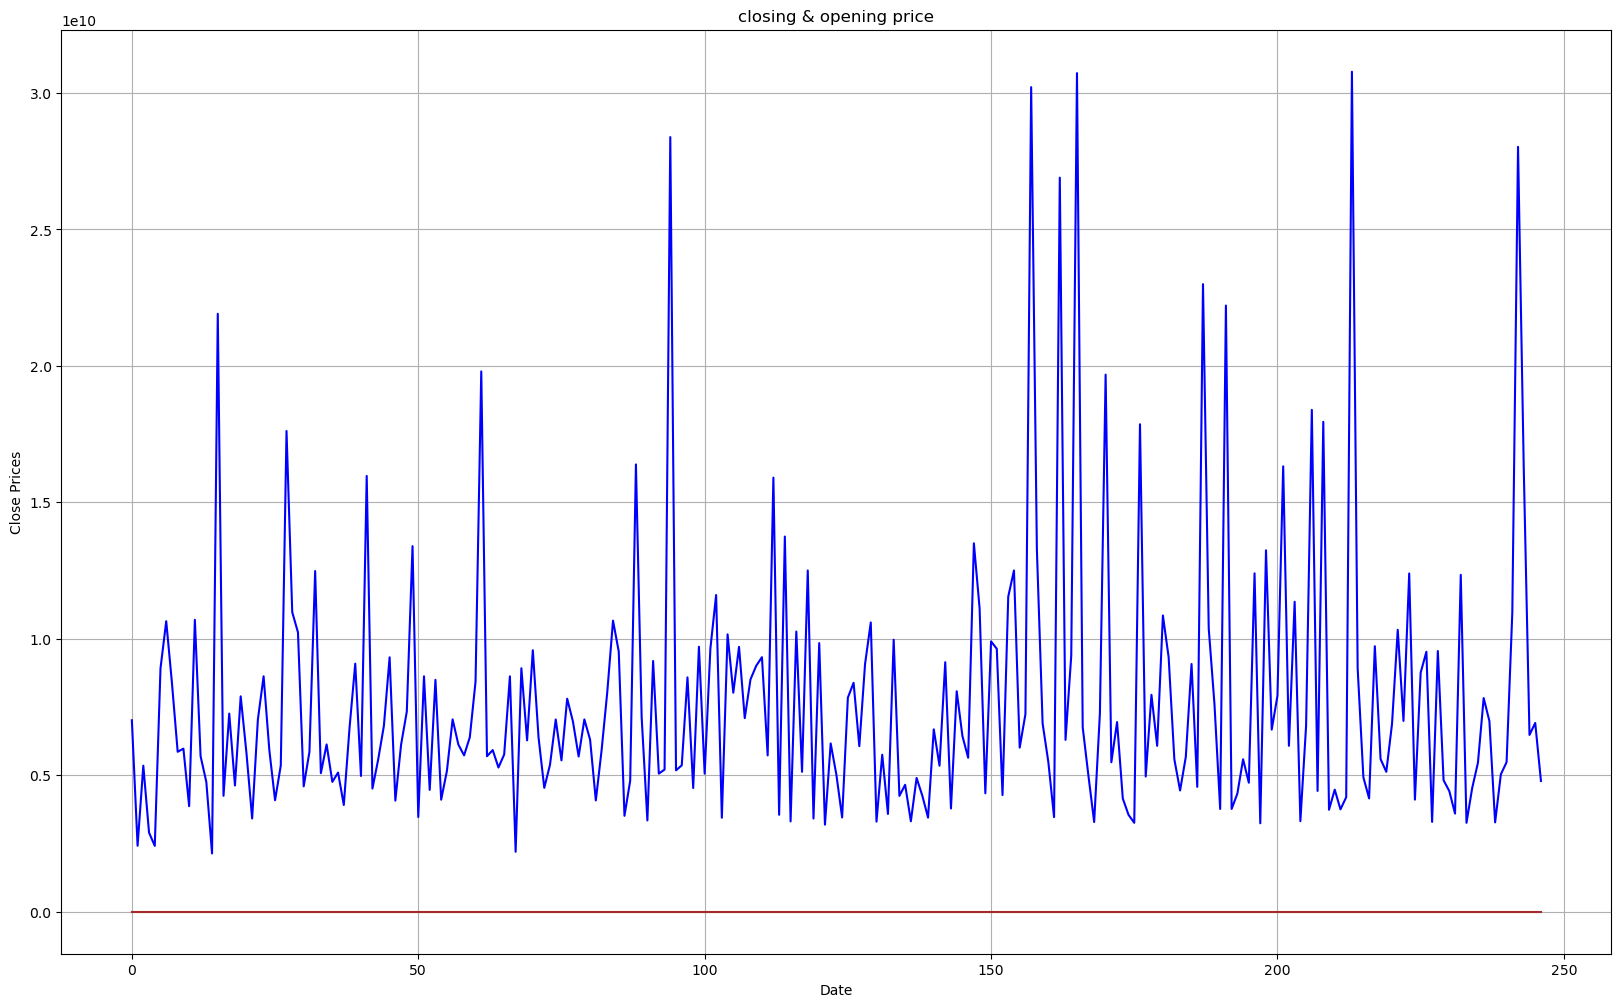

In [28]:
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
#plt.plot(dataset['Close'])
plt.plot(y_pred, color="brown")
plt.plot(y_test, color="Blue")
plt.title('closing & opening price')
plt.show()

In [30]:
mse = mean_squared_error(y_pred,y_test)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_pred,y_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_test - y_pred)/np.abs(y_test))
print('MAPE: '+str(mape))

MSE: 8.682217815312821e+19
MAE: 7813158041.06824
RMSE: 9317841925.74269
MAPE: 0.9993823243912299


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)
y_true_binary = np.where(y_test > threshold, 1, 0)

In [33]:
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

In [34]:
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score: {:.2%}".format(f1))

Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\KIIT\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\KIIT\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by th